# Dijkstra's Algorithm - Algorithms Final Project
By Jacob Minikel, John Poquette, Autumn Mizer

Dataset(s): https://www.diag.uniroma1.it/challenge9/download.shtml

In [1]:
# Imports
from collections import defaultdict
import heapq
import time
import math
import numpy as np

In [2]:
def build_graph(filename):
    """
    Builds a graph from a file in the specified format.
    Parameters:
        filename (str): The path to the input file.
    Returns:
        dict: A dictionary representing the graph as an adjacency list.
    """
    # Initialize graph - Adjacency List Representation
    graph = defaultdict(list)
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('c') or line.startswith('p'):
                continue  # Skip comments and problem header
            if line.startswith('a'):
                parts = line.split()
                if len(parts) == 4:
                    _, u, v, w = parts
                    graph[int(u)].append((int(v), int(w)))
    return graph

def dijkstra(graph, start, end=None):
    """
    Dijkstra's algorithm to find shortest paths.
    
    Parameters:
    - graph: defaultdict(list) where graph[u] = [(v, weight), ...]
    - start: Starting node ID
    - end: Optional end node ID (if None, compute distances to all nodes)
    
    Returns:
    - If end is specified: float (distance to end or inf if unreachable)
    - If end is None: dict mapping nodes to distances
    """
    # Initialize distances
    dist = {node: float('inf') for node in graph}
    dist[start] = 0
    
    # Priority queue: (distance, node) - Min-Heap Representation
    pq = [(0, start)]
    
    while pq:
        current_dist, u = heapq.heappop(pq)
        # Skip if we've found a better path already
        if current_dist > dist.get(u, float('inf')):
            continue
        
        # If end is specified and we've reached it, return the distance
        if end is not None and u == end:
            return current_dist
        
        # Process all neighbors of the current node
        for v, weight in graph.get(u, []):
            new_dist = current_dist + weight
            if new_dist < dist.get(v, float('inf')):
                dist[v] = new_dist
                heapq.heappush(pq, (new_dist, v))
    
    # If end was specified but not reached, return inf
    # If end was not specified, return distances to all nodes
    return float('inf') if end is not None else dist

In [3]:

# Build the graph from the input file
graph = build_graph("USA-road-d.NY.gr")

# Denote start and (optional) end nodes
start_node = 1
end_node = 264346

In [4]:
# Example 1: Shortest path from node 1 to node 264346
distance = dijkstra(graph, start_node, end_node)
print(f"Shortest path distance from {start_node} to {end_node}: "
    f"{distance if distance != float('inf') else 'unreachable'}")

Shortest path distance from 1 to 264346: 495306


In [5]:
# Example 2: Shortest paths from node 1 to all nodes
distances = dijkstra(graph, start_node)
print(f"\nShortest path distances from node {start_node} to some nodes:")
for node in range(1, min(11, len(distances) + 1)):  # Print first 10 nodes
    dist_value = distances.get(node, float('inf'))
    print(f"To node {node}: {dist_value if dist_value != float('inf') else 'unreachable'}")
print(f"To node 264346: {distances.get(264346, float('inf')) if distances.get(264346, float('inf')) != float('inf') else 'unreachable'}")


Shortest path distances from node 1 to some nodes:
To node 1: 0
To node 2: 803
To node 3: 50999
To node 4: 50841
To node 5: 20130
To node 6: 20904
To node 7: 34326
To node 8: 35857
To node 9: 54635
To node 10: 56308
To node 264346: 495306


In [6]:
# Testing Custom Cases
graph_directed = {
    'A': [('B', 7), ('C', 12)],
    'B': [('D', 9), ('C', 2)],
    'C': [('E', 10)],
    'D': [('F', 1), ('E', 4)],
    'E': [('F', 5)],
    'F': []
}

graph_undirected = {
    'A': [('B', 7), ('C', 12)],
    'B': [('A', 7), ('D', 9), ('C', 2)],
    'C': [('A', 12), ('B', 2), ('E', 10)],
    'D': [('B', 9), ('F', 1), ('E', 4)],
    'E': [('C', 10), ('D', 4), ('F', 5)],
    'F': [('D', 1), ('E', 5)]
}

# Denote start and (optional) end nodes for custom tests
start_node = 'A'
end_node = 'F'

In [7]:
# Test with directed graph
distance_directed = dijkstra(graph_directed, start_node, end_node)
print(f"Directed: Shortest path from {start_node} to {end_node}: "
      f"{distance_directed if distance_directed != float('inf') else 'unreachable'}")

# Test with undirected graph
distance_undirected = dijkstra(graph_undirected, start_node, end_node)
print(f"Undirected: Shortest path from {start_node} to {end_node}: "
      f"{distance_undirected if distance_undirected != float('inf') else 'unreachable'}")

# Test distances to all nodes
distances_directed = dijkstra(graph_directed, start_node)
distances_undirected = dijkstra(graph_undirected, start_node)
print("\nDirected distances from A:")
for node in ['A', 'B', 'C', 'D', 'E', 'F']:
    print(f"To {node}: {distances_directed[node]}")
print("\nUndirected distances from A:")
for node in ['A', 'B', 'C', 'D', 'E', 'F']:
    print(f"To {node}: {distances_undirected[node]}")

Directed: Shortest path from A to F: 17
Undirected: Shortest path from A to F: 17

Directed distances from A:
To A: 0
To B: 7
To C: 9
To D: 16
To E: 19
To F: 17

Undirected distances from A:
To A: 0
To B: 7
To C: 9
To D: 16
To E: 19
To F: 17


## Benchmarking

This section will be benchmarking all of the different graph datasets within the USA road network challenge set. I will load each dataset, store the size of the dataset (nodes and edges), and then run a benchmark on Dijkstra's Algorithm to get accurate times (not the building graph part, just Dijkstra's Algorithm). By getting a time analysis compared to both the node and edge size, we hope to be able to draw conclusions about the recorded time analysis compared to the true time analysis. 

In [8]:
# Creating benchmark function
# Taking average time over multiple iterations to get reliable measurements
def benchmark_dijkstra(graph, start, end=None, iterations=10):
    total_time = 0.0
    for _ in range(iterations):
        start_time = time.time()
        dijkstra(graph, start, end)
        end_time = time.time()
        total_time += (end_time - start_time)
    average_time = total_time / iterations
    return average_time

# Creating graphs for benchmarking
# def create_dense_graph(num_nodes, weight=1):
#     graph = defaultdict(list)
#     for u in range(num_nodes):
#         for v in range(num_nodes):
#             if u != v:
#                 graph[u].append((v, weight))
#     return graph

In [9]:
# Listing multiple graph datasets for benchmarking
graph_datasets = [
    "USA-road-d.NY.gr", 
    "USA-road-d.BAY.gr", 
    "USA-road-d.COL.gr", 
    "USA-road-d.FLA.gr", 
    "USA-road-d.NW.gr", 
    "USA-road-d.NE.gr", 
    "USA-road-d.CAL.gr", 
    "USA-road-d.LKS.gr", 
    "USA-road-d.E.gr", 
    "USA-road-d.W.gr"# , 
    # "USA-road-d.CTR.gr", 
    # "USA-road-d.USA.gr"
    ]

# Building graphs from datasets
graphs = []
for dataset in graph_datasets:
    graphs.append(build_graph(dataset))

In [10]:
results = []
# Benchmarking Dijkstra's algorithm on each graph
for i, graph in enumerate(graphs):
    avg_time = benchmark_dijkstra(graph, start_node, iterations=50)
    results.append((graph_datasets[i], avg_time))
    print(f"Average time for graph {graph_datasets[i]}: {avg_time:.6f} seconds")

Average time for graph USA-road-d.NY.gr: 0.088567 seconds
Average time for graph USA-road-d.BAY.gr: 0.105034 seconds
Average time for graph USA-road-d.COL.gr: 0.154792 seconds
Average time for graph USA-road-d.FLA.gr: 0.355263 seconds
Average time for graph USA-road-d.NW.gr: 0.448107 seconds
Average time for graph USA-road-d.NE.gr: 0.597131 seconds
Average time for graph USA-road-d.CAL.gr: 0.703571 seconds
Average time for graph USA-road-d.LKS.gr: 1.009799 seconds
Average time for graph USA-road-d.E.gr: 1.338509 seconds
Average time for graph USA-road-d.W.gr: 2.355551 seconds


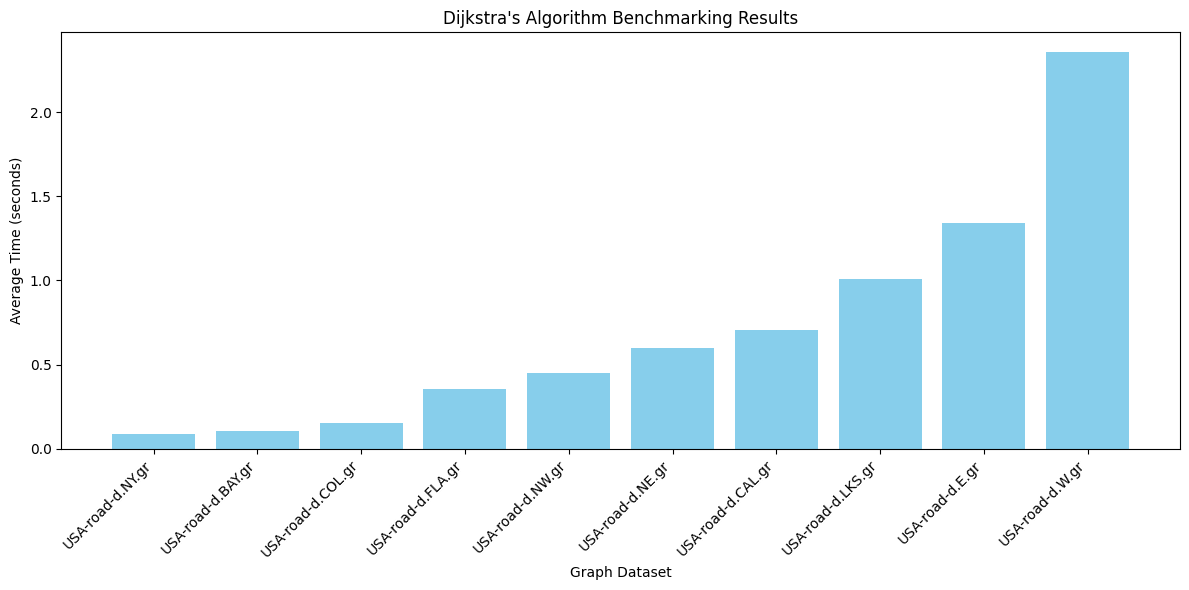

In [11]:
# Dataset sizes
dataset_sizes = {
    "USA-road-d.NY.gr": (264346, 733846),
    "USA-road-d.BAY.gr": (321270, 800172),
    "USA-road-d.COL.gr": (435666, 1057066),
    "USA-road-d.FLA.gr": (1070376, 2712798),
    "USA-road-d.NW.gr": (1207945, 2840208),
    "USA-road-d.NE.gr": (1524453, 3897636),
    "USA-road-d.CAL.gr": (1890815, 4657742),
    "USA-road-d.LKS.gr": (2758119, 6885658),
    "USA-road-d.E.gr": (3598623, 8778114),
    "USA-road-d.W.gr": (6262104, 15248146)# ,
    # "USA-road-d.CTR.gr": (14081816, 34292496),
    # "USA-road-d.USA.gr": (23947347, 58333344)
}

# Graphing results
import matplotlib.pyplot as plt
graph_names = [result[0] for result in results]
times = [result[1] for result in results]
plt.figure(figsize=(12, 6))
plt.bar(graph_names, times, color='skyblue')
plt.xlabel('Graph Dataset')
plt.ylabel('Average Time (seconds)')
plt.title("Dijkstra's Algorithm Benchmarking Results")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

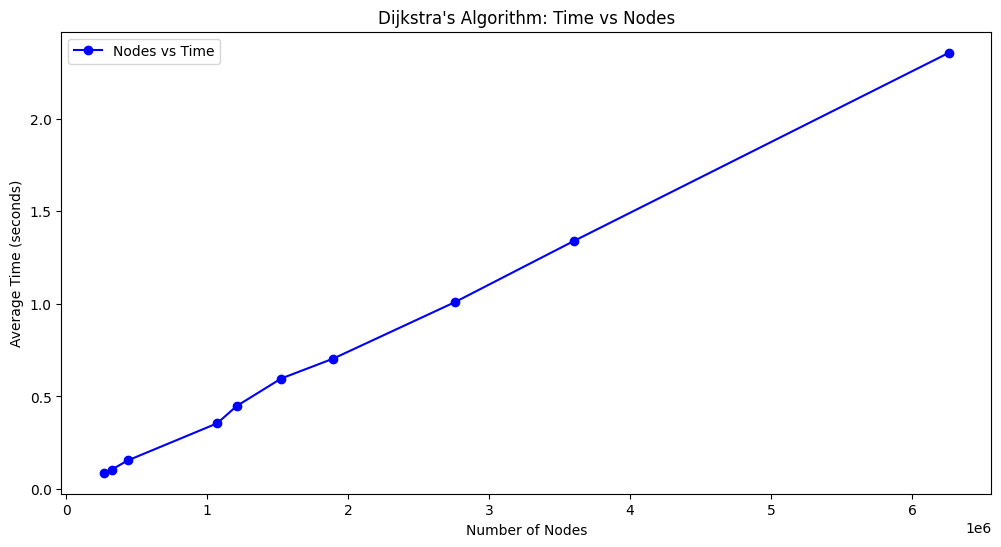

In [12]:
# Graphing results with respect to number of nodes and edges
nodes = [dataset_sizes[name][0] for name in graph_names]
edges = [dataset_sizes[name][1] for name in graph_names]
plt.figure(figsize=(12, 6))
plt.plot(nodes, times, color='blue', label='Nodes vs Time', marker='o')
plt.xlabel('Number of Nodes')
plt.ylabel('Average Time (seconds)')
plt.title("Dijkstra's Algorithm: Time vs Nodes")
plt.legend()
plt.show()

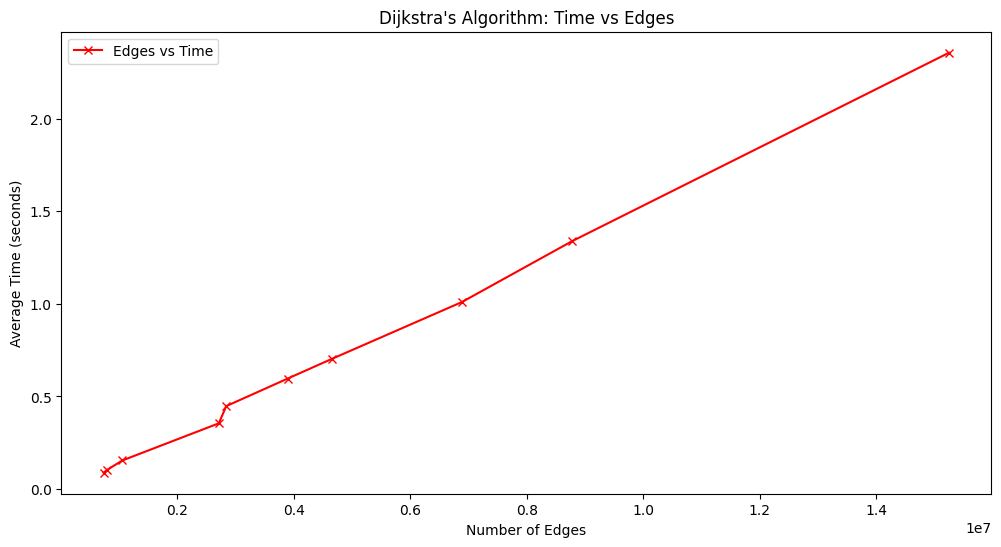

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(edges, times, color='red', label='Edges vs Time', marker='x')
plt.xlabel('Number of Edges')
plt.ylabel('Average Time (seconds)')
plt.title("Dijkstra's Algorithm: Time vs Edges")
plt.legend()
plt.show()

In [23]:
# Compute the theoretical complexity value for every dataset
theory = np.array([(v + e) * np.log(v) for v, e in zip(nodes, edges)])

measured = np.array(times)

# Sort by theoretical value so the line is monotonic
sort_idx = np.argsort(theory)
theory_sorted = theory[sort_idx]
time_sorted   = measured[sort_idx]

# Linear fit: time ≈ c × (V + E) log V
c, _ = np.polyfit(theory_sorted, time_sorted, 1)
fitted = c * theory_sorted

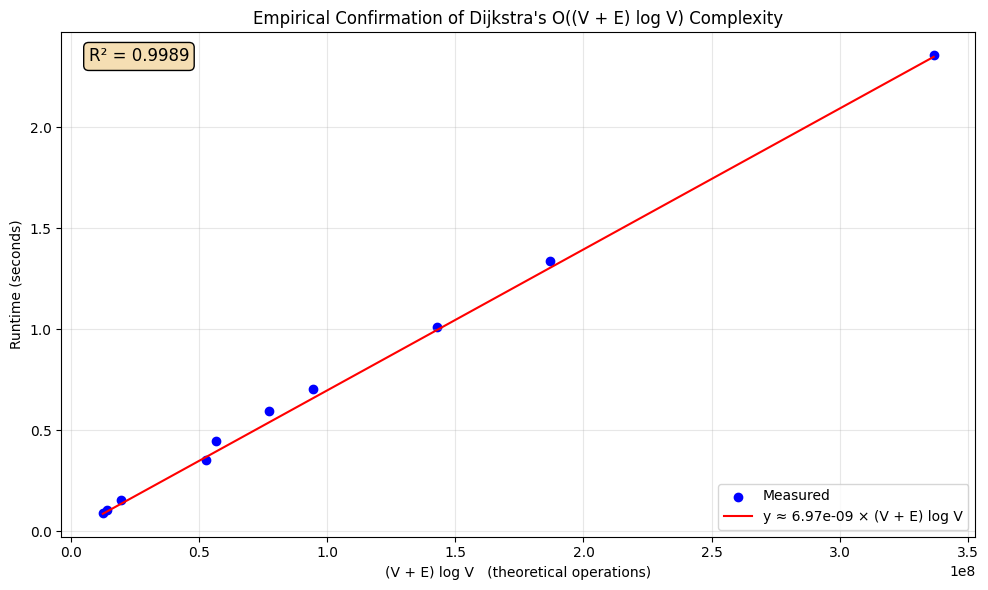

In [24]:
# Visualizing times against theoretical runtime (scaled linearly for easy view)
plt.figure(figsize=(10, 6))
plt.scatter(theory_sorted, time_sorted, color='blue', label='Measured')
plt.plot(theory_sorted, fitted, color='red',
         label=f'y ≈ {c:.2e} × (V + E) log V')

plt.xlabel('(V + E) log V   (theoretical operations)')
plt.ylabel('Runtime (seconds)')
plt.title("Empirical Confirmation of Dijkstra's O((V + E) log V) Complexity")
plt.legend()
plt.grid(True, alpha=0.3)

# Show R²
r = np.corrcoef(theory_sorted, time_sorted)[0,1]
plt.text(0.03, 0.97, f'R² = {r**2:.4f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor="wheat"))

plt.tight_layout()
plt.show()

Due to the R^2 value of 0.9989, it indicates that our implementation of Dijkstra's Algorithm lines up with the theoretical runtime of O((V+E) log V), meaning that we can confirm that Dijkstra's Algorithm runs in O((V+E) log V) time.